### Laboratorio 6 - Ejercicio 1
Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo

-----------

`Ejercicio 1`

Cree un programa en Python (o en el lenguaje de su preferencia) para modelar la distribución de temperatura dentro
de una varilla sólida. Utilice modelado secuencial multiescala, donde <font color=orange>combina un modelo macroscópico y un
modelo microscópico</font>. Suponga que la varilla consta de dos materiales diferentes con diferentes conductividades
térmicas. Considere los siguientes pasos propuestos

1. Cree una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo macroscópico.

Como primer paso, se le pidió a ChatGPT que desarrollara esta función. Para esto, se le dio las siguientes instrucciones:

<font color=lightblue>

- Crea una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo macroscópico. Para esto considera lo siguiente:    
    - La varilla es de 100cm; los 50cm de la derecha son de un material, y los 50cm de la izquierda son de otro material.
    - Al lado izquierdo de la varilla se le aplica una temperatura de 0°C, y al lado derecho de la varilla se le aplica una temperatura de 100°C.
    - No hay fuentes externas que agreguen o quiten calor.
</font>

Con este promt, ChatGPT desarrolló el siguiente código a la primera. No fue necesario hacer repregutnas debido a la claridad de las instrucciones iniciales.

*En la carpeta screens está el screenshot de la conversación con ChatGPT (E1_1.png)*

In [31]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import uuid
from PIL import Image
from IPython.display import display, Image as IPImage


# Parámetros del problema
L = 100.0                       # Longitud total de la varilla (en cm)
N = 100                         # Número de puntos en la discretización espacial
dx = L / N                      # Tamaño del paso espacial
dt = 1                          # Tamaño del paso temporal
T_left = 0.0                    # Temperatura en el extremo izquierdo (en °C)
T_right = 100.0                 # Temperatura en el extremo derecho (en °C)
t_max = 50.0                    # Tiempo máximo de simulación (en segundos)

# Conductividades térmicas de los materiales
k_material1 = 2
k_material2 = 3

# Inicialización de la distribución de temperatura
T = [T_left] * N                # Inicializar la varilla a T_left

T[int(N / 2):] = [T_right] * int(N / 2)  # Establecer la temperatura derecha
T[int(N / 2):] = [T_right] * int(N / 2)  # Establecer la temperatura derecha

En este caso, se implementó un modelo macroscópico que calcula la distribución de temperatura en una varilla compuesta por dos materiales con diferentes conductividades térmicas. Utiliza las ecuaciones de difusión del calor para actualizar la temperatura en cada punto de la varilla en función de las conductividades térmicas de los materiales y las diferencias de temperatura en puntos adyacentes. 

In [32]:
# Modelo macroscópico
def macroscopic_model(T, k_material1, k_material2):
    T_new = np.copy(T)
    alpha1 = k_material1 / (dx ** 2)
    alpha2 = k_material2 / (dx ** 2)
    
    for i in range(1, N - 1):
        if i < N // 2:
            T_new[i] = T[i] + alpha1 * (T[i + 1] - 2 * T[i] + T[i - 1]) * dt
        else:
            T_new[i] = T[i] + alpha2 * (T[i + 1] - 2 * T[i] + T[i - 1]) * dt
    
    return T_new

2. Cree una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo microscópico.

Posteriormente, se le pidió a Chat que realizara la siguiente función a través de una simulación de monte carlo. Esto con el propósito de modelar la interacción a nivel molecular de las diferentes partículas. A continuación se presenta el prompt utilizado.


<font color=lightblue>

- Crea una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo microscópico. Para esto considera lo siguiente:    
    - La varilla es de 100cm; los 50cm de la derecha son de un material, y los 50cm de la izquierda son de otro material.
    - Al lado izquierdo de la varilla se le aplica una temperatura de 0°C, y al lado derecho de la varilla se le aplica una temperatura de 100°C.
    - No hay fuentes externas que agreguen o quiten calor.
    - Utilize un modelo de Monte Carlo para simular la interacción a nivel molecular de las diferentes partículas. Esto es, considere que las partículas se mueven de manera aleatoria y que interactúan con las partículas vecinas.
</font>

Con este promt, ChatGPT desarrolló el siguiente código a la primera. No fue necesario hacer repreguntas debido a la claridad de las instrucciones iniciales.

*En la carpeta screens está el screenshot de la conversación con ChatGPT (E1_2.png)*

Como se puede observar a continuación, en este caso se tiene un modelo que utiliza Monte Carlo para simular la transferencia de calor a nivel molecular dentro de una varilla compuesta por dos materiales diferentes con diferentes conductividades térmicas. 

Más específicamente, se utiliza Monte Carlo simular el comportamiento aleatorio de partículas y su interacción en el contexto de la transferencia de calor a nivel molecular, lo que permite modelar la propagación del calor en la varilla de manera realista.

In [33]:
# Modelo microscópico utilizando Monte Carlo
def microscopic_model(T, k_material1, k_material2):
    T_new = np.copy(T)
    alpha1 = k_material1 / (dx ** 2)
    alpha2 = k_material2 / (dx ** 2)
    
    for i in range(1, N - 1):
        if i < N // 2:
            for _ in range(100):
                j = np.random.randint(1, N - 1)
                T_new[j] = T_new[j] + alpha1 * (T_new[j + 1] - 2 * T_new[j] + T_new[j - 1]) * dt / 100
        else:
            for _ in range(100):
                j = np.random.randint(1, N - 1)
                T_new[j] = T_new[j] + alpha2 * (T_new[j + 1] - 2 * T_new[j] + T_new[j - 1]) * dt / 100
    
    return T_new

3. Combine ambos modelos para implementar un enfoque de modelado secuencial de múltiples escalas, donde el modelo macroscópico proporciona condiciones de contorno para el modelo microscópico.

Posteriormente, se utilizó las funciones de los modelos (macroscópico y microscópico) para implementar el modelado secuencial de múltiples escalas. 

En este caso, como se puede observar en el código, el modelado secuencial de múltiples escalas permite capturar tanto los efectos macroscópicos como los microscópicos en la propagación del calor, utilizando primero el modelo macroscópico para proporcionar condiciones de contorno al modelo microscópico y, posteriormente, refinando la simulación a nivel microscópico.

En cada iteración de la simulación se almacena el estado de temperatura de la varilla en un arreglo, lo que permite visualizar la evolución de la temperatura en el tiempo.

In [34]:
# Modelado secuencial de multiples escalas
def sec_multiescala(T):
    time_steps = int(t_max / dt)
    historial = [np.copy(T)]

    for _ in range(time_steps):
        T = macroscopic_model(T, k_material1, k_material2)
        T = microscopic_model(T, k_material1, k_material2)

        # Guardar el estado actual de la simulación
        historial.append(np.copy(T))

    return historial


4. Simule y visualice la distribución de temperatura dentro de la varilla durante un período de tiempo
determinado.

En esta sección se código, se simula la distribución de temperatura dentro de la varilla durante un período de tiempo determinado al inicio del programa. 

Se tomó como referencia el Laboratorio 5 de Modelación y Simulación (https://github.com/20Candy/lab5_modsim/blob/main/ejercicio1.ipynb) para graficar la temperatura en función del tiempo y la posición en la varilla como un GIF

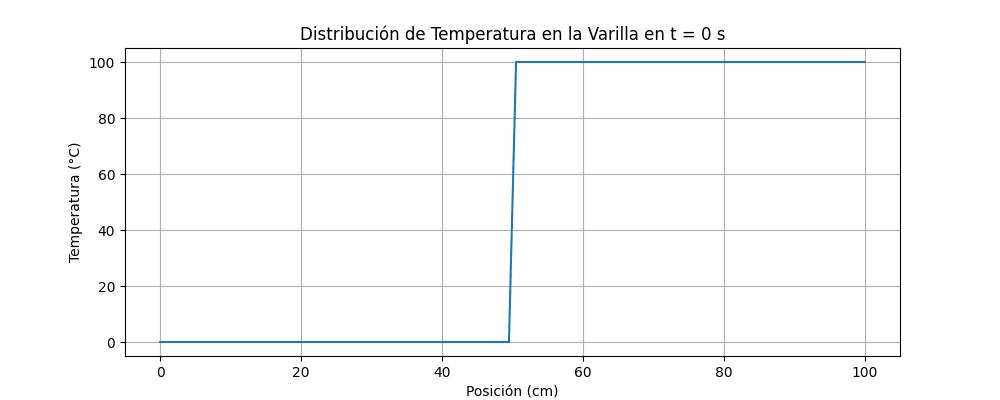

In [35]:
historial = sec_multiescala(T)
list_images = []

for i, t2 in enumerate(historial):
    plt.figure(figsize=(10, 4))
    x = np.linspace(0, L, N)
    plt.plot(x, t2)
    plt.xlabel('Posición (cm)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Distribución de Temperatura en la Varilla en t = {} s'.format(i * dt))
    plt.grid(True)

    name = "eje1_fotos_gif/" + str(i) + ".jpg"

    # Guardar la figura en un archivo
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)

# Crear el GIF
images = [Image.open(path) for path in list_images]
images[0].save('ejercicio1.gif', save_all=True, append_images=images[1:], loop=0, duration=200)

# Mostrar el GIF
display(IPImage("ejercicio1.gif"))

-----------

##### **Preguntas**

1. ¿En qué se diferencia el modelo macroscópico del modelo microscópico en este escenario?

El modelo macroscópico se diferencia del modelo microscópico en la escala a la que operan y en la forma en que calculan la distribución de temperatura en la varilla.

Por ejemplo, el modelo macroscópico calcula la distribución de temperatura en la varilla utilizando una ecuación de difusión del calor a nivel macroscópico. Más específicamente, divide la varilla en segmentos y aplica la ecuación de calor a nivel macroscópico para calcular cómo la temperatura cambia en cada segmento con el tiempo. Cabe destacar que hace uso de las conductividades térmicas de los dos materiales diferentes en la varilla y aplica las diferencias de conductividad térmica en su cálculo.

Por otro lado, el modelo microscópico opera a una escala mucho más pequeña y utiliza un enfoque de Monte Carlo. En este caso, se simula el comportamiento de partículas individuales a nivel microscópico en la varilla. Cada partícula individual se somete a procesos aleatorios que representan la transferencia de calor a nivel microscópico. Este modelo simula un gran número de partículas para calcular la distribución de temperatura en la varilla con el tiempo.

2. ¿Cuáles son las condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico?

Las condiciones de contorno del modelo microscópico se determinan en función de la distribución de temperatura calculada por el modelo macroscópico. En particular, el modelo macroscópico proporciona las temperaturas en los extremos izquierdo y derecho de la varilla, que actúan como condiciones de contorno para el modelo microscópico. Esto significa que el modelo microscópico "hereda" las temperaturas en los extremos de la varilla que fueron calculadas por el modelo macroscópico.

Cuando la temperatura se distribuye de manera macroscópica en la varilla, el modelo microscópico simula la interacción de partículas individuales dentro de la varilla, pero teniendo en cuenta las temperaturas en los extremos proporcionadas por el modelo macroscópico. Esto permite que el modelo microscópico reproduzca efectos microscópicos y fluctuaciones en la distribución de temperatura, pero siempre manteniendo la coherencia con las condiciones macroscópicas establecidas por el modelo macroscópico.

3.  ¿Cómo adaptaría este modelo multiescala si la varilla estuviera compuesta por más de dos materiales diferentes?

Para adaptar este modelo multiescala a una varilla compuesta por más de dos materiales diferentes, se tendrían que primero definir las conductividades térmicas de los nuevos materiales en la varilla. Asimismo, se debería de indicar si los materiales están mezclados o si es una varilla compuesta por segmentos discretos de cada material.

Posteriormente, dependiendo del caso (si los materiales están mezclados), se debería de actualizar las funciones para considerar la composición de la varilla. Asimismo, sería necesario actualizar ambos modelos para que consideren las nuevas conductividades térmicas de los materiales en la varilla.

Nuevamente, se considera que el enfoque de Monte Carlo para el modelo microscópico es ideal. Sin embargo, nuevamente, se tendría que tomar en cuenta las conductividades térmicas de los distintos materiales al seleccionar aleatoriamente las partículas y calcular la transferencia de calor entre ellas.

Las condiciones de contorno para el modelo microscópico se seguirían determinando a partir de las temperaturas proporcionadas por el modelo macroscópico en los extremos de la varilla, teniendo en cuenta las conductividades térmicas de los materiales adyacentes.